
**Name: Sparsh Saxena** <BR>
**Registration No.: 21BCE6015** <BR>
**Slot: L57+L58** <BR>
**Lab 9 Assignment** <BR>
**Machine Learning Lab** <BR>
**Submitted to: Ms. R.Jothi** <br>
**Colab Link:** https://colab.research.google.com/drive/16fNkqGQBpsmdgpoonZMugo06vlSKEtnX#scrollTo=2ItxkMC9IV8c

#**Question:** <br>

Consider heart disease predication problem. Apply all the machine learning algorithms that you have learnt in the past weeks, and compare their performances.

<br>1) Report all the pre-processing steps
<br>2) Plot confusion matrix for all the algorithms
<br>3) You may also try applying PCA and check the performance changes.


#**Importing Libraries**

In [250]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier
                             )
import xgboost as xgb
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

#**EDA and Preprocessing of Data**

In [251]:
# Read the dataset

df = pd.DataFrame(pd.read_csv("heart (1).csv"))

In [252]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [253]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [254]:
# Null Values if present or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [255]:
# Checking for duplicates

df.duplicated().sum()

723

In [256]:
# Removing the duplicate values from the data

df.drop_duplicates(inplace = True)

In [257]:
# Checking the numerical distribution of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [258]:
# Checking the label counts of the target label

df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

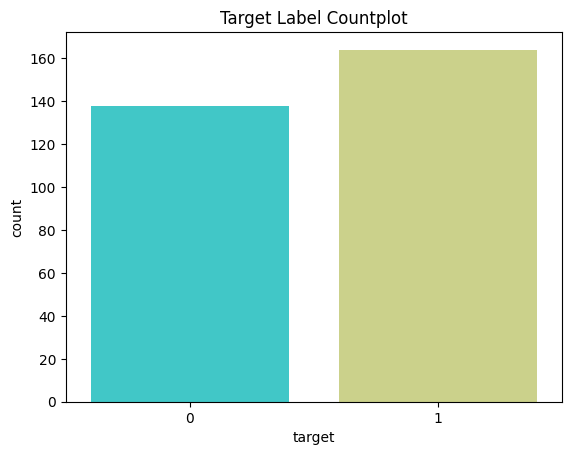

In [259]:
# Visualisation for the count of labels of target column.

plt.title("Target Label Countplot")
sns.countplot(x = "target", data = df, palette = "rainbow")
plt.show()

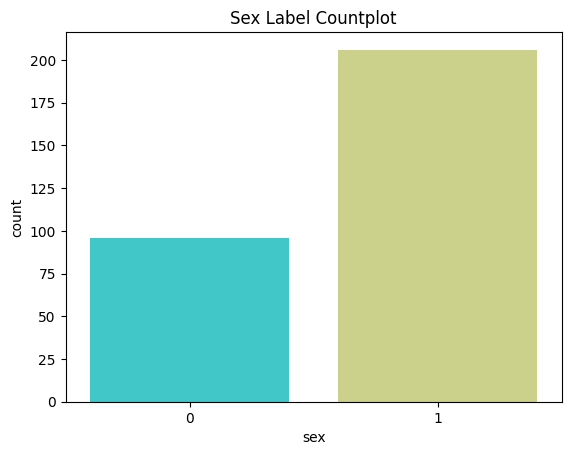

In [260]:
# Visualisation for the count of labels of sex column.

plt.title("Sex Label Countplot")
sns.countplot(x = "sex", data = df, palette = "rainbow")
plt.show()

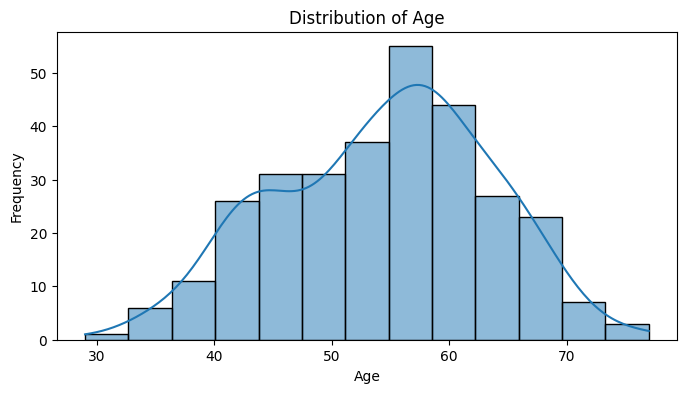

In [261]:
# Visualisation for age wise distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=13, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#**Train Test Split**

In [262]:
# Separating train and test datasets and also applying the scaler for further processing.

scaler = StandardScaler()

X = df.drop("target",axis=1)
y = df['target']

X1 = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

#**Model Evaluation**

In [263]:
# Normal Models

normal_models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Support Vector Machines': SVC(kernel='rbf',tol=0.001,gamma=1/14),
    'Gaussian Naive Bayes' : GaussianNB(),
    'Multi Layer Perceptron' : MLPClassifier(hidden_layer_sizes = (14,2),solver='adam',activation='relu',max_iter=500)
}

analysis_data = []
for model_name in normal_models:
  model = normal_models[model_name]
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  analysis_data.append([model_name,round(accuracy_score(pred,y_test)*100,2),round(precision_score(pred,y_test)*100,2),round(f1_score(pred,y_test)*100,2)])

display(pd.DataFrame(list(sorted(analysis_data,reverse=True,key = lambda x: x[1])),columns=["Model","Accuracy(%)","Precision(%)","F1-Score(%)"]))

,Model,Accuracy(%),Precision(%),F1-Score(%)
0,Gaussian Naive Bayes,85.25,86.21,84.75
1,Multi Layer Perceptron,78.69,82.76,78.69
2,Logistic Regression,77.05,89.66,78.79
3,Support Vector Machines,77.05,82.76,77.42
4,Decision Tree Classifier,72.13,68.97,70.18


In [264]:
# Ensemble Models

ensemble_models = {
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'AdaBoost Classifier' : AdaBoostClassifier(),
    'XG Boost Classifier' : xgb.XGBClassifier()
}

analysis_data = []
for model_name in ensemble_models:
  model = ensemble_models[model_name]
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  analysis_data.append([model_name,round(accuracy_score(pred,y_test)*100,2),round(precision_score(pred,y_test)*100,2),round(f1_score(pred,y_test)*100,2)])

display(pd.DataFrame(list(sorted(analysis_data,reverse=True,key = lambda x: x[1])),columns=["Model","Accuracy(%)","Precision(%)","F1-Score(%)"]))

,Model,Accuracy(%),Precision(%),F1-Score(%)
0,Random Forest Classifier,85.25,89.66,85.25
1,Gradient Boosting Classifier,80.33,86.21,80.65
2,XG Boost Classifier,80.33,86.21,80.65
3,AdaBoost Classifier,78.69,82.76,78.69


#**Confusion Matrices for three best performing models from both categories** <br>

**Normal Models (with accuracy):**
<br>1) Gaussian Naive Bayes (85.25 % )
<br>2) Multi Layer Perceptron (78.69 %)
<br>3) Logistic Regression (77.05 %)


**Ensemble Models (with accuracy):**
<br>1) Random Forest Classifier (85.25 %)
<br>2) Gradient Boosting and XG Boost Classifier (80.33 %)
<br>3) AdaBoost Classifier (78.69 %)




**Normal Methods**

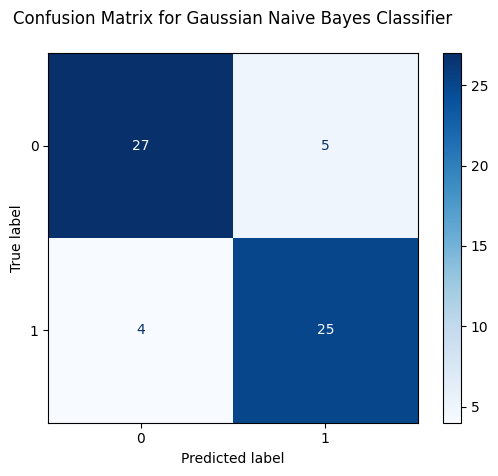

In [265]:
# Gaussian Naive Bayes Classifier

model = GaussianNB()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for Gaussian Naive Bayes Classifier\n"
disp.ax_.set_title(title)
plt.show()

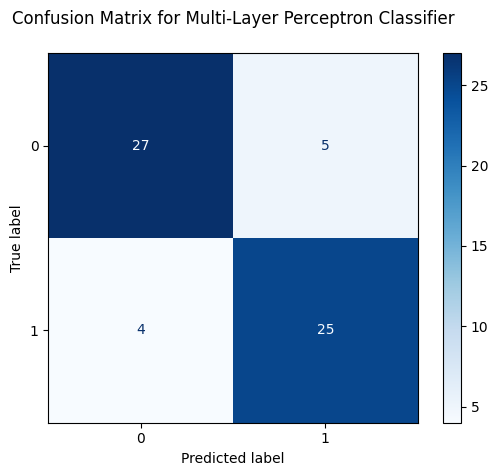

In [266]:
# Multi-Layer Perceptron

model = MLPClassifier(hidden_layer_sizes = (14,2),solver='adam',activation='relu',max_iter=500)
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for Multi-Layer Perceptron Classifier\n"
disp.ax_.set_title(title)
plt.show()

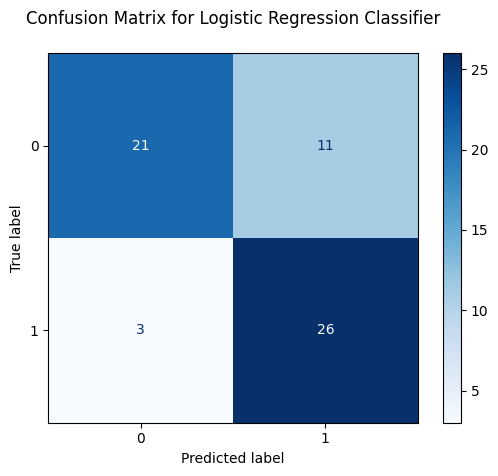

In [267]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for Logistic Regression Classifier\n"
disp.ax_.set_title(title)
plt.show()

**Ensemble Methods**

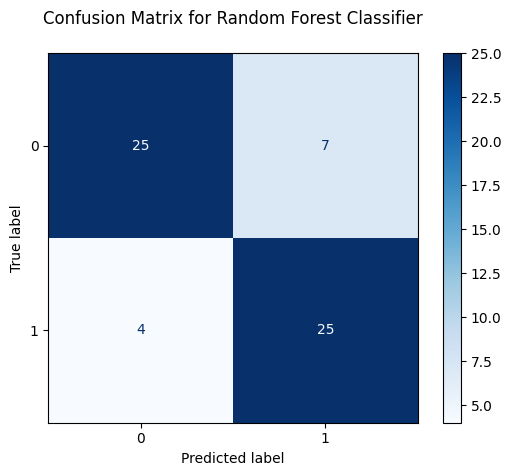

In [268]:
# Random Forest Classifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for Random Forest Classifier\n"
disp.ax_.set_title(title)
plt.show()

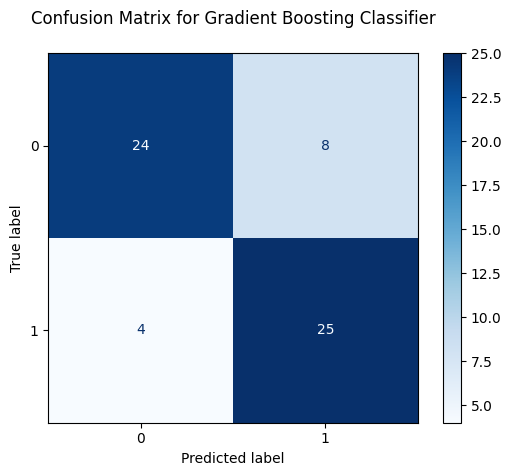

In [269]:
# Gradient Boosting Classifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for Gradient Boosting Classifier\n"
disp.ax_.set_title(title)
plt.show()

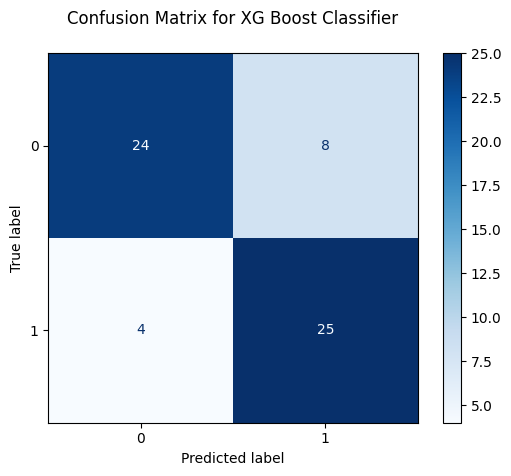

In [270]:
# XG Boost Classifier

model = xgb.XGBClassifier()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for XG Boost Classifier\n"
disp.ax_.set_title(title)
plt.show()

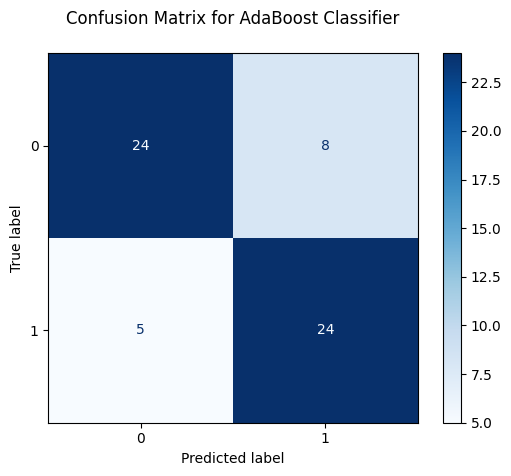

In [248]:
# AdaBoost Classifier

model = AdaBoostClassifier()
model.fit(X_train,y_train)

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
      model,
      X_test,
      y_test,
      display_labels = df['target'].unique(),
      cmap=plt.cm.Blues
)
title = f"Confusion Matrix for AdaBoost Classifier\n"
disp.ax_.set_title(title)
plt.show()

#**PCA Application to check for improvements**

In [278]:
# Applying PCA to the data

print("PCA Analysis : \n\n")

k = 2

best_models = {
  'Multi-Layer Perceptron Classifier' : MLPClassifier(hidden_layer_sizes=(k+1,2),solver="adam",activation="relu",max_iter=500),
  'Gaussian Naive Bayes Classifier' : GaussianNB(),
  'Logistic Regression' : LogisticRegression(),
  'Random Forest Classifier': RandomForestClassifier(),
  'XG Boost Classifier' : xgb.XGBClassifier(),
  'Gradient Boosting Classifier' : GradientBoostingClassifier(),
  'AdaBoost Classifier' : AdaBoostClassifier()
}

while(k < 6):
  print("For number of components = ",k," : \n")
  pca = PCA(n_components = k)
  X_pca = pca.fit_transform(X1)

  X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

  analysis_data = []
  for model_name in best_models:
    model = best_models[model_name]
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    analysis_data.append([model_name,round(accuracy_score(pred,y_test)*100,2)])

  display(pd.DataFrame(list(sorted(analysis_data,reverse = True,key = lambda x: x[1])),columns=["Model Used","Accuracy Score (%)"]))

  k+=1

  print()

PCA Analysis : 


For number of components =  2  : 



,Model Used,Accuracy Score (%)
0,Logistic Regression,83.61
1,Gaussian Naive Bayes Classifier,81.97
2,Random Forest Classifier,81.97
3,AdaBoost Classifier,81.97
4,Gradient Boosting Classifier,77.05
5,Multi-Layer Perceptron Classifier,75.41
6,XG Boost Classifier,73.77



For number of components =  3  : 



,Model Used,Accuracy Score (%)
0,Gaussian Naive Bayes Classifier,81.97
1,Logistic Regression,81.97
2,Multi-Layer Perceptron Classifier,77.05
3,Random Forest Classifier,77.05
4,XG Boost Classifier,72.13
5,Gradient Boosting Classifier,72.13
6,AdaBoost Classifier,72.13



For number of components =  4  : 



,Model Used,Accuracy Score (%)
0,Logistic Regression,83.61
1,Gaussian Naive Bayes Classifier,81.97
2,Random Forest Classifier,81.97
3,XG Boost Classifier,81.97
4,Multi-Layer Perceptron Classifier,80.33
5,Gradient Boosting Classifier,77.05
6,AdaBoost Classifier,70.49



For number of components =  5  : 



,Model Used,Accuracy Score (%)
0,Multi-Layer Perceptron Classifier,83.61
1,Gaussian Naive Bayes Classifier,81.97
2,Logistic Regression,81.97
3,Random Forest Classifier,80.33
4,Gradient Boosting Classifier,80.33
5,XG Boost Classifier,77.05
6,AdaBoost Classifier,73.77


**Results before PCA after preprocessing ->** <br>
**1) Best normal model is Gaussian Naive Bayes Classifier with 85.25 % accuracy.** <br>
**2) Best ensemble model is Random Forest Classifier with 85.25 % accuracy.**

**Results after PCA ->** <br>
**1) Best normal model is Logistic Regression with 83.61 % accuracy with 2 principal components (keeping them as low as possible).** <br>
**2) Best ensemble model is Random Forest Classifier with 81.97 % accuracy with also 2 principal components.**


**Removing duplicates is the step that will lead to significant reduction in accuracy as there are 723 duplicated values which is more than half of the dataset. Without this step the model becomes severely overfit with 100 % accuracy for tree-based classifiers after PCA.**